We want to approximate the function:
\begin{equation}
  y = \tanh(x)
\end{equation}
by a rational function of the form:
\begin{equation}
  y_a = \frac{a_1 x + a_3 x^3}{b_0 + b_2 x^2 + b_4 x^4}
\end{equation}
using the curve fitting facilities of the SciPy package. Due to the fact that the numerator is an odd function and the denominator is an even function, we enforce an odd symmetry in our approximant - which is desirable because our $\tanh$ function to be approximated has odd symmetry as well. Also, due to the fact, that the order of the denominator is one higher than the order of the numerator, the absolute value will show an asymptotic behavior proportional to $1/x$, so our approximating function will be bounded. That might be important when it's going to be used as saturation function in a feedback path, for example. For our task, we need the following imports:

In [1]:
from numpy import linspace, tanh
from scipy.optimize import curve_fit

For the curve fitting routine, we need to define a function that takes an input value $x$ and a parameter vector $p$ and returns a scalar $y$-value. The parameter vector may consist of several separate parameters in which case python's parameter packing/unpacking mechanisms can be used. We will do it that way, so we will pass the parameters separately:

In [2]:
def f(x, a1, a3, b0, b2, b4):
    return (a1*x + a3*x**3) / (b0 + b2*x**2 + b4*x**4)

The curve fitting routines work by finding a parameter vector for a parametrized function that optimally fits a dataset in a least-squares sense. That means, the curve fitter finds a parameter vector that minimizes the sum of the squares of the errors between the target values and the datapoints. For nonlinear optimization problems (such as this one), there may be several local minima of the error function and the curve fitter will give only a local minimum - not necessarily a global one. Which local minimum is found depends on an initial guess $p_0$ and the dataset itself. That's why define a driver function that takes the maximum $x$-value and the number of datapoints as parameters. The minimum $x$-value will be fixed to zero since the target function has odd symmetry and our approximating function has also odd symmetry by construction - so providing data for the negative $x$-axis would be redundant.

In [3]:
def fit_tanh(x_max = 4, N = 200):
    x = linspace(0, x_max, N)
    y = tanh(x)
    p, c = curve_fit(f, x, y)  # 2nd output is covariance
    return p

Having defined this driver function, let's use it to find a good parameter vector, using 165 values between 0 and 7:

In [4]:
p = fit_tanh(7, 165)
print(p)

[ 2790.75502174   183.61700731  2816.12938     1076.23087891    11.39061185]


The resulting parameter vector depends strongly on the maximum value (7) and the number of datapoints (165) - this particular choice has been found by trial and error, using several runs with different values. Now that we have found our optimal parameter vector, we may use it. So we create an $x$-axis, compute the true function $y$ and the approximate function $y_a$ and plot both:

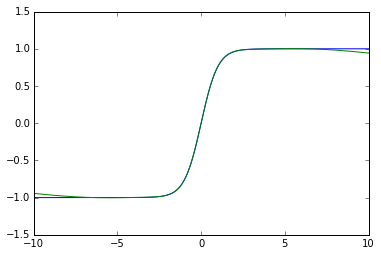

In [5]:
from matplotlib import pylab as plt
%matplotlib inline
x  = linspace(-10, 10, 1000)
y  = tanh(x)
ya = f(x, *p)
plt.plot(x, y)
plt.plot(x, ya)

As we can see, the $y_a$ function approximates $y$ reasonably well in the range $[-7, 7]$ and deviates beyond that range.